# 1.1 INDICE - CONTENIDO

In [185]:
print('1. Introduction')
print('2. Importacion de librerias')
print('3. Lectura de datos')
print('4. Anilisis por columna')
print('5. Busqueda y analisis de datos nulos')
print('5. Reemplazamiento de datos nulos y atipicos')
print('6. Creacion de nuevas columnas')
print('7. Visualizacion de datos')
print('8. Analisis mediante pivot_table')
print('9. Creacion de nuevo dataset(probability)')
print('10. Conclusiones')

1. Introduction
2. Importacion de librerias
3. Lectura de datos
4. Anilisis por columna
5. Busqueda y analisis de datos nulos
5. Reemplazamiento de datos nulos y atipicos
6. Creacion de nuevas columnas
7. Visualizacion de datos
8. Analisis mediante pivot_table
9. Creacion de nuevo dataset(probability)
10. Conclusiones


# 1.2 CONTEXTO - PROYECTO

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos
para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la
cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


# 1.3 CARGA DE LIBRERIAS

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as np
import scipy as np

# 1.4 CARGA DE DATOS

In [187]:
calls_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_calls.csv')
internet_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_internet.csv')
messages_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_messages.csv')
plans_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_plans.csv')
users_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_users.csv')

In [188]:
calls_data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


# 2.0 PREPRACION DE DATASETS

In [189]:
global_data_messages = pd.merge(users_data, messages_data, on='user_id')

In [190]:
global_data_calls = pd.merge(users_data, calls_data, on='user_id')

In [191]:
global_data_internet = pd.merge(users_data, internet_data, on='user_id')

# 2.1 ANALISIS DE NULOS

## DATASET - MESSAGES

In [192]:
global_data_messages

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_125,2018-12-27
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_160,2018-12-31
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_223,2018-12-31
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_251,2018-12-27
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_255,2018-12-26
...,...,...,...,...,...,...,...,...,...,...
76046,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_526,2018-12-24
76047,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_536,2018-12-24
76048,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_547,2018-12-31
76049,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_558,2018-12-24


In [193]:
global_data_messages.isnull().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      71654
id                  0
message_date        0
dtype: int64

Observamos que la columna churn_date tiene un gran numero de NaN o datos nulos pero en este caso lo que nos quiere decir es que el usuario no se dio de baja.

## DATASET - CALLS

In [194]:
global_data_calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_93,2018-12-27,8.52
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_145,2018-12-27,13.66
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_247,2018-12-27,14.48
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_309,2018-12-28,5.76
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_380,2018-12-30,4.22
...,...,...,...,...,...,...,...,...,...,...,...
137730,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_199,2018-11-21,8.72
137731,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_200,2018-10-20,10.89
137732,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_201,2018-09-21,8.12
137733,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_202,2018-10-10,0.37


In [195]:
global_data_calls.isnull().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date    128736
id                 0
call_date          0
duration           0
dtype: int64

Observamos que la columna churn_date tiene un gran numero de NaN o datos nulos pero en este caso lo que nos quiere decir es que el usuario no se dio de baja.

## DATASET - INTERNET

In [196]:
global_data_internet

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_13,2018-12-29,89.86
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_204,2018-12-31,0.00
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_379,2018-12-28,660.40
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_413,2018-12-26,270.99
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_442,2018-12-27,880.22
...,...,...,...,...,...,...,...,...,...,...,...
104820,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_215,2018-10-20,218.06
104821,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_216,2018-12-30,304.72
104822,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_217,2018-09-22,292.75
104823,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_218,2018-12-07,0.00


In [197]:
global_data_internet.isnull().sum()

user_id             0
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan                0
churn_date      97359
id                  0
session_date        0
mb_used             0
dtype: int64

Observamos que la columna churn_date tiene un gran numero de NaN o datos nulos pero en este caso lo que nos quiere decir es que el usuario no se dio de baja.

A priori vemos muy pocos datos nulos por lo que esto nos permitira un analisis muy estable.

# EDA PROCESAMIENTO DATASETS

## PROCESAMIENTO DATASET - MESSAGES

In [198]:
global_data_messages['month_message'] = global_data_messages['message_date'].str.split('-').str[1]

Vamos a crear una columna para aislar solo el mes como una de la variables importantes. Al analizar la columna vemos que el estudio solo es de 2018. Por lo que aislamos solo la segunda cadena de datos despues del '-'.

In [199]:
global_data_messages

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date,month_message
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_125,2018-12-27,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_160,2018-12-31,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_223,2018-12-31,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_251,2018-12-27,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_255,2018-12-26,12
...,...,...,...,...,...,...,...,...,...,...,...
76046,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_526,2018-12-24,12
76047,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_536,2018-12-24,12
76048,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_547,2018-12-31,12
76049,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497_558,2018-12-24,12


In [200]:
new_global_data_messages = pd.pivot_table(global_data_messages, values='id', index=['user_id','first_name','last_name','plan'], columns=['month_message'], aggfunc=np.count_nonzero, fill_value=0, margins=True)

In [201]:
new_global_data_messages

,,,month_message,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,first_name,last_name,plan,,,,,,,,,,,,,
1000,Anamaria,Bauer,ultimate,0,0,0,0,0,0,0,0,0,0,0,11,11
1001,Mickey,Wilkerson,surf,0,0,0,0,0,0,0,30,44,53,36,44,207
1002,Carlee,Hoffman,surf,0,0,0,0,0,0,0,0,0,15,32,41,88
1003,Reynaldo,Jenkins,surf,0,0,0,0,0,0,0,0,0,0,0,50,50
1004,Leonila,Thompson,surf,0,0,0,0,7,18,26,25,21,24,25,31,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,Elvie,Jones,surf,0,0,0,0,0,0,0,0,11,29,31,37,108
1494,Preston,Downs,surf,0,0,0,0,0,0,20,27,21,38,35,33,174
1496,Ariel,Shepherd,surf,0,0,0,0,0,0,0,2,21,18,13,11,65


<AxesSubplot:xlabel='user_id,first_name,last_name'>

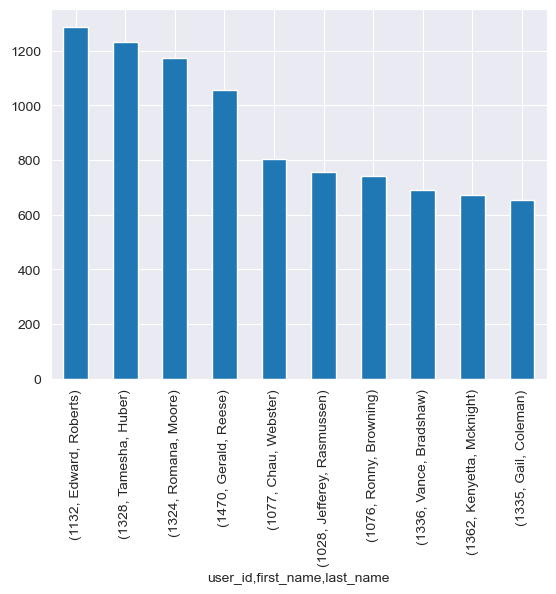

In [202]:
global_data_messages.groupby(['user_id','first_name','last_name']).size().sort_values(ascending=False).head(10).plot(kind='bar')

En el grafico podemos observar los usuarios que mas mensajes usan en el año.

## PROCESAMIENTO DATASET - INTERNET

In [203]:
global_data_internet['month_session'] = global_data_internet['session_date'].str.split('-').str[1]

In [204]:
global_data_internet

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used,month_session
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_13,2018-12-29,89.86,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_204,2018-12-31,0.00,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_379,2018-12-28,660.40,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_413,2018-12-26,270.99,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_442,2018-12-27,880.22,12
...,...,...,...,...,...,...,...,...,...,...,...,...
104820,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_215,2018-10-20,218.06,10
104821,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_216,2018-12-30,304.72,12
104822,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_217,2018-09-22,292.75,09
104823,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_218,2018-12-07,0.00,12


In [205]:
new_global_data_internet = pd.pivot_table(global_data_internet, values='id', index=['user_id','first_name','last_name','plan'], columns=['month_session'], aggfunc=np.count_nonzero, fill_value=0, margins=True)

In [206]:
new_global_data_internet

,,,month_session,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,first_name,last_name,plan,,,,,,,,,,,,,
1000,Anamaria,Bauer,ultimate,0,0,0,0,0,0,0,0,0,0,0,5,5
1001,Mickey,Wilkerson,surf,0,0,0,0,0,0,0,25,53,56,51,60,245
1002,Carlee,Hoffman,surf,0,0,0,0,0,0,0,0,0,21,52,51,124
1003,Reynaldo,Jenkins,surf,0,0,0,0,0,0,0,0,0,0,0,52,52
1004,Leonila,Thompson,surf,0,0,0,0,17,73,69,72,56,51,69,53,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Ariel,Shepherd,surf,0,0,0,0,0,0,0,27,51,54,40,53,225
1497,Donte,Barrera,ultimate,0,0,0,0,0,0,0,0,0,0,0,31,31
1498,Scot,Williamson,surf,0,58,56,57,66,50,68,59,57,64,57,65,657


<AxesSubplot:xlabel='user_id,first_name,last_name'>

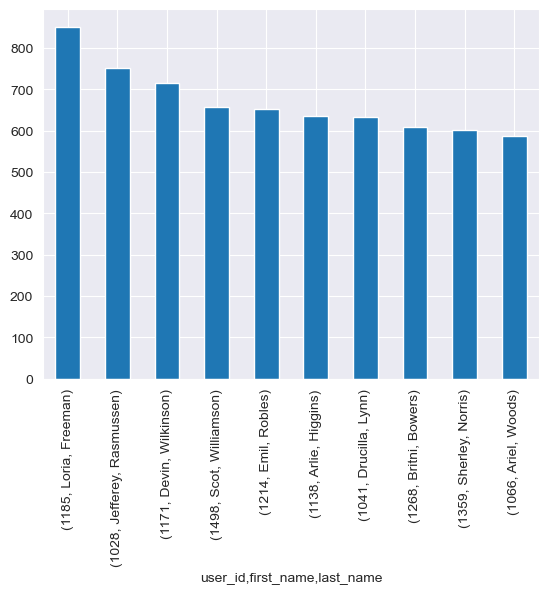

In [207]:
global_data_internet.groupby(['user_id','first_name','last_name']).size().sort_values(ascending=False).head(10).plot(kind='bar')

En el grafico podemos observar los usuarios que mas megas usados en el año.

## PROCESAMIENTO DATASET - CALLS

In [208]:
global_data_calls['month_call'] = global_data_calls['call_date'].str.split('-').str[1]

In [209]:
global_data_calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,month_call
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_93,2018-12-27,8.52,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_145,2018-12-27,13.66,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_247,2018-12-27,14.48,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_309,2018-12-28,5.76,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000_380,2018-12-30,4.22,12
...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_199,2018-11-21,8.72,11
137731,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_200,2018-10-20,10.89,10
137732,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_201,2018-09-21,8.12,09
137733,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499_202,2018-10-10,0.37,10


In [210]:
new_global_data_calls = pd.pivot_table(global_data_calls, values='id', index=['user_id','first_name','last_name','plan'], columns=['month_call'], aggfunc=np.count_nonzero, fill_value=0, margins=True)

In [211]:
new_global_data_calls

,,,month_call,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,first_name,last_name,plan,,,,,,,,,,,,,
1000,Anamaria,Bauer,ultimate,0,0,0,0,0,0,0,0,0,0,0,16,16
1001,Mickey,Wilkerson,surf,0,0,0,0,0,0,0,27,49,65,64,56,261
1002,Carlee,Hoffman,surf,0,0,0,0,0,0,0,0,0,11,55,47,113
1003,Reynaldo,Jenkins,surf,0,0,0,0,0,0,0,0,0,0,0,149,149
1004,Leonila,Thompson,surf,0,0,0,0,21,44,49,49,42,61,54,50,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Ariel,Shepherd,surf,0,0,0,0,0,0,0,18,52,46,39,40,195
1497,Donte,Barrera,ultimate,0,0,0,0,0,0,0,0,0,0,0,54,54
1498,Scot,Williamson,surf,0,37,37,47,35,37,43,44,45,46,41,39,451


<AxesSubplot:xlabel='user_id,first_name,last_name'>

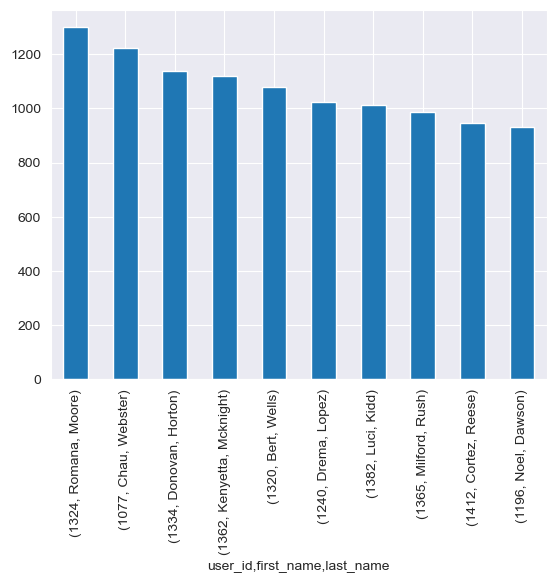

In [212]:
global_data_calls.groupby(['user_id','first_name','last_name']).size().sort_values(ascending=False).head(10).plot(kind='bar')

En el grafico podemos observar los usuarios que mas minutos de llamadas usan en el año.

In [226]:
new_global_data_calls = pd.pivot_table(global_data_calls, values='id', index=['user_id','first_name','last_name','plan'], columns=['month_call'], aggfunc=np.count_nonzero, fill_value=0, margins=True)

In [227]:
new_global_data_calls

,,,month_call,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,first_name,last_name,plan,,,,,,,,,,,,,
1000,Anamaria,Bauer,ultimate,0,0,0,0,0,0,0,0,0,0,0,16,16
1001,Mickey,Wilkerson,surf,0,0,0,0,0,0,0,27,49,65,64,56,261
1002,Carlee,Hoffman,surf,0,0,0,0,0,0,0,0,0,11,55,47,113
1003,Reynaldo,Jenkins,surf,0,0,0,0,0,0,0,0,0,0,0,149,149
1004,Leonila,Thompson,surf,0,0,0,0,21,44,49,49,42,61,54,50,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Ariel,Shepherd,surf,0,0,0,0,0,0,0,18,52,46,39,40,195
1497,Donte,Barrera,ultimate,0,0,0,0,0,0,0,0,0,0,0,54,54
1498,Scot,Williamson,surf,0,37,37,47,35,37,43,44,45,46,41,39,451


In [232]:
new_global_data_calls['plan_payment'] = np.where(new_global_data_calls['month_plan'] == 'surf', 20, 70)

KeyError: 'month_plan'